<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience2/blob/main/15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/extra_32x32.mat

--2024-01-27 06:14:46--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat.1’

train_32x32.mat.1   100%[===================>] 173.61M  58.5MB/s    in 3.0s    

2024-01-27 06:14:50 (58.5 MB/s) - ‘train_32x32.mat.1’ saved [182040794/182040794]

--2024-01-27 06:14:50--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat.1’

test_32x32.mat.1    100%[===================>]  61.30M  37.8MB/s    in 1.6s    

2024-01-27 06:14:51 (37.8 MB/s) - ‘test_32x32.mat.1’ saved [642

In [3]:
data_train = loadmat("train_32x32.mat")
data_test = loadmat("test_32x32.mat")
data_extra = loadmat("extra_32x32.mat")

## EDA

In [4]:
data_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Dec  5 21:09:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[[[ 33,  84,  19, ...,  92, 190, 216],
          [ 30,  76,  54, ...,  78, 188, 217],
          [ 38,  59, 110, ..., 101, 191, 212]],
 
         [[ 15,  86,  20, ...,  94, 205, 221],
          [ 23,  73,  52, ...,  82, 203, 222],
          [ 19,  66, 111, ..., 105, 206, 217]],
 
         [[ 15,  77,  25, ..., 114, 220, 226],
          [ 17,  78,  57, ..., 101, 218, 227],
          [ 19,  56, 116, ..., 125, 220, 221]],
 
         ...,
 
         [[ 72,  90,  65, ..., 200, 229, 200],
          [ 65,  78, 144, ..., 201, 231, 199],
          [ 56,  69, 223, ..., 203, 224, 191]],
 
         [[ 82,  88,  78, ..., 192, 229, 193],
          [ 77,  77, 148, ..., 193, 229, 188],
          [ 57,  67, 218, ..., 195, 224, 182]],
 
         [[ 89,  88,  98, ..., 190, 229, 197],
          [ 79,  78, 158, ..., 191, 228, 189],
          [ 59,  66, 220, 

In [5]:
type(data_train)

dict

In [6]:
# Every dictionary has 3 attributes: .items(), .keys(), .values()
data_train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [7]:
data_test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [8]:
X_train = data_train['X']
X_test = data_test['X']
X_extra = data_extra['X']


X_train = np.transpose(X_train, (3, 0, 1, 2))
X_test = np.transpose(X_test, (3, 0, 1, 2))
X_extra = np.transpose(X_extra, (3, 0 ,1, 2))

X_train = np.concatenate((X_train, X_extra[:1000]))


y_train = data_train['y']
y_test = data_test['y']
y_extra = data_extra['y']

y_train = np.concatenate((y_train, y_extra[:1000]))

In [9]:
type(X_train)

numpy.ndarray

In [10]:
X_train.shape

(74257, 32, 32, 3)

In [11]:
# Replace 10 with 0
y_train = np.where(y_train==10, 0, y_train)
y_test = np.where(y_test==10, 0, y_test)
y_extra = np.where(y_extra==10, 0, y_extra)

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
# Normalize
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0
X_extra = X_extra.astype(np.float32) / 255.0

In [14]:
# Extra PreProcessing: OneHotEncoding
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_extra = to_categorical(y_test)

Label of 59302th image is: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


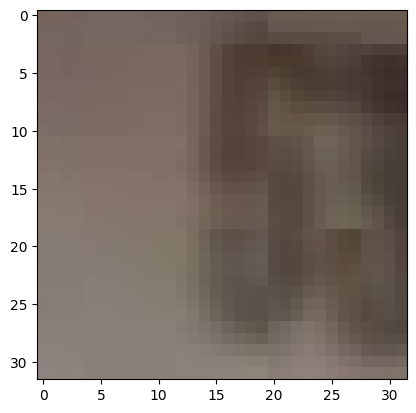

In [15]:
i = np.random.randint(1, len(X_train))
print(f"Label of {i}th image is: {y_train[i]}")
plt.imshow(X_train[i])

## CNNs

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, Dropout
from keras.optimizers import Adam

In [17]:
model = Sequential()

model.add(InputLayer(input_shape=X_train[0].shape))

model.add(Conv2D(32, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))

model.add(Flatten())
# Overfitting handling
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dense(len(y_train[0]), activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dropout (Dropout)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                        

In [19]:
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
2089/2089 [==============================] - 16s 5ms/step - loss: 0.9030 - accuracy: 0.7144 - val_loss: 0.4719 - val_accuracy: 0.8660
Epoch 2/20
2089/2089 [==============================] - 9s 4ms/step - loss: 0.5019 - accuracy: 0.8513 - val_loss: 0.4001 - val_accuracy: 0.8854
Epoch 3/20
2089/2089 [==============================] - 10s 5ms/step - loss: 0.4275 - accuracy: 0.8706 - val_loss: 0.3654 - val_accuracy: 0.8947
Epoch 4/20
2089/2089 [==============================] - 9s 4ms/step - loss: 0.3801 - accuracy: 0.8852 - val_loss: 0.3488 - val_accuracy: 0.8951
Epoch 5/20
2089/2089 [==============================] - 9s 4ms/step - loss: 0.3437 - accuracy: 0.8959 - val_loss: 0.3362 - val_accuracy: 0.9016
Epoch 6/20
2089/2089 [==============================] - 10s 5ms/step - loss: 0.3150 - accuracy: 0.9039 - val_loss: 0.3431 - val_accuracy: 0.8987
Epoch 7/20
2089/2089 [==============================] - 10s 5ms/step - loss: 0.2830 - accuracy: 0.9135 - val_loss: 0.3192 - val_accur

In [20]:
# Batch size is usually set to 32 or 64 to save up RAM

In [21]:
score = model.evaluate(X_test, y_test)
print("test loss:", score[0])
print("test accuracy:", score[1])

814/814 [==============================] - 3s 3ms/step - loss: 0.5090 - accuracy: 0.8936
test loss: 0.5090281963348389
test accuracy: 0.8936309218406677


In [22]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
